In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [2]:

path = '../../../Atliq Marts Challenge'
fact_order_lines_df=pd.read_csv(path+"/fact_order_lines.csv")
# fact_orders_aggregate_df=pd.read_csv("Atliq Marts Challenge/fact_orders_aggregate.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")
dim_customers=pd.read_csv(path+"/dim_customers.csv")
dim_products=pd.read_csv(path+"/dim_products.csv")
dim_targets_orders=pd.read_csv(path+"/dim_targets_orders.csv")



In [3]:
# result =  pd.concat([fact_order_lines_df, fact_orders_aggregate_df], axis=1,join="outer")
# result =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
# esult =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
result =pd.merge( fact_order_lines_df ,dim_customers , how="outer",on=["customer_id"])
result =pd.merge( result ,dim_products , how="outer",on=["product_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])

In [4]:
train_SC.columns = [col.lower().replace(' ', '_') for col in train_SC.columns]
train_SC.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
train_SC.rename(columns=lambda x: x.replace("%", "_percent"), inplace=True)

In [5]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57096 entries, 0 to 57095
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               57096 non-null  object
 1   order_placement_date   57096 non-null  object
 2   customer_id            57096 non-null  int64 
 3   product_id             57096 non-null  int64 
 4   order_qty              57096 non-null  int64 
 5   agreed_delivery_date   57096 non-null  object
 6   actual_delivery_date   57096 non-null  object
 7   delivery_qty           57096 non-null  int64 
 8   in_full                57096 non-null  int64 
 9   on_time                57096 non-null  int64 
 10  on_time_in_full        57096 non-null  int64 
 11  customer_name          57096 non-null  object
 12  city                   57096 non-null  object
 13  product_name           57096 non-null  object
 14  category               57096 non-null  object
 15  ontime_target_perce

In [6]:
train_SC[train_SC['customer_id'] == 789201].to_csv('output789201.csv', index=False)

In [7]:
selected_rows = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

In [8]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 52360 to 52445
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               86 non-null     object
 1   order_placement_date   86 non-null     object
 2   customer_id            86 non-null     int64 
 3   product_id             86 non-null     int64 
 4   order_qty              86 non-null     int64 
 5   agreed_delivery_date   86 non-null     object
 6   actual_delivery_date   86 non-null     object
 7   delivery_qty           86 non-null     int64 
 8   in_full                86 non-null     int64 
 9   on_time                86 non-null     int64 
 10  on_time_in_full        86 non-null     int64 
 11  customer_name          86 non-null     object
 12  city                   86 non-null     object
 13  product_name           86 non-null     object
 14  category               86 non-null     object
 15  ontime_target_perc

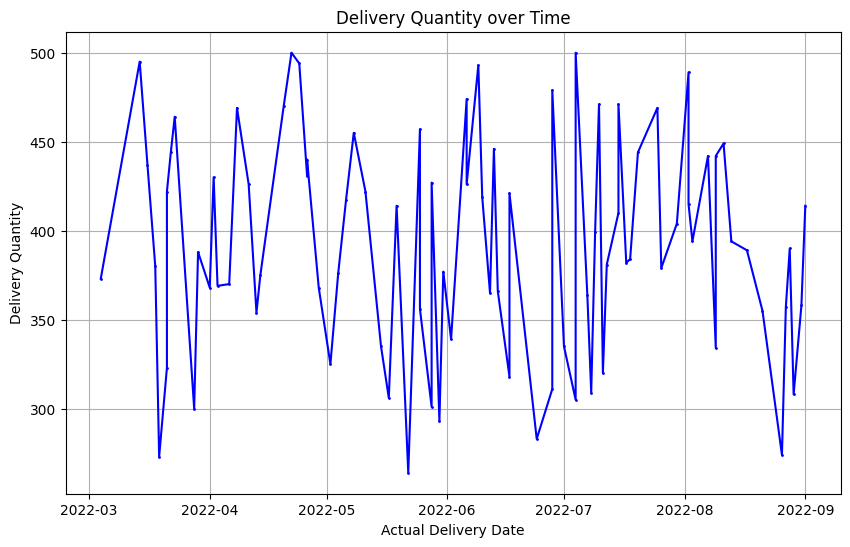

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming selected_rows is your DataFrame

# Convert 'actual_delivery_date' to datetime format
selected_rows['actual_delivery_date_formatted'] = pd.to_datetime(selected_rows['actual_delivery_date'], format='%d-%b-%y')

# Sort DataFrame by 'actual_delivery_date_formatted'
df_sorted_Predict = selected_rows.sort_values(by='actual_delivery_date_formatted')
df_sorted_Predict.to_csv('output.csv', index=False)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_Predict['actual_delivery_date_formatted'], df_sorted_Predict['delivery_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)
plt.show()


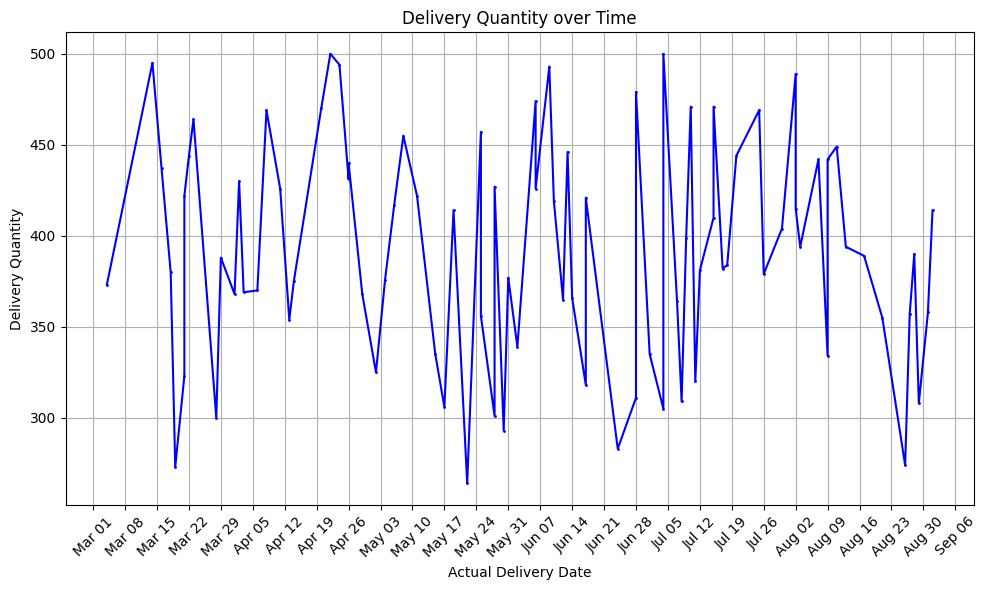

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming selected_rows is your DataFrame

# Convert 'actual_delivery_date' to datetime format
selected_rows['actual_delivery_date_formatted'] = pd.to_datetime(selected_rows['actual_delivery_date'], format='%d-%b-%y')

# Sort DataFrame by 'actual_delivery_date_formatted'
df_sorted_actual_delivery_date = selected_rows.sort_values(by='actual_delivery_date_formatted')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_actual_delivery_date['actual_delivery_date_formatted'], df_sorted_actual_delivery_date['delivery_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)

# Set x-axis major ticks to represent weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [11]:
df =df_sorted_actual_delivery_date

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'

# Convert date columns to datetime format
df['order_placement_date'] = pd.to_datetime(df['order_placement_date'])
df['agreed_delivery_date'] = pd.to_datetime(df['agreed_delivery_date'])
df['actual_delivery_date'] = pd.to_datetime(df['actual_delivery_date'])

# Extract time-related features
df['order_placement_month'] = df['order_placement_date'].dt.month
df['order_placement_day'] = df['order_placement_date'].dt.day
df['order_placement_dayofweek'] = df['order_placement_date'].dt.dayofweek

# Fit ARIMA model for order quantity
arima_model = ARIMA(df['order_qty'], order=(5, 1, 0))  # Example order parameters
arima_results = arima_model.fit()

# Obtain ARIMA forecasts
arima_forecast = arima_results.forecast(steps=len(df))
arima_forecast.index = df.index
# Add ARIMA forecasts as additional feature
df['arima_forecast'] = arima_forecast



# Split data into features and target variable (if applicable)


# Define predictors and target variable
# X = df[['customer_id', 'product_id', 'delivery_qty', 'in_full', 'on_time', 'on_time_in_full',
#         'ontime_target_percent', 'infull_target_percent', 'otif_target_percent',
#         'order_placement_month', 'order_placement_day', 'order_placement_dayofweek', 'arima_forecast']]
X= df.drop(columns=['order_qty']) 
y = df['order_qty']

# Split data into train and test sets

# Split the data into train and test sets, leaving out the last 200 rows
X_train, X_test = X.iloc[:-20], X.iloc[-20:]
y_train, y_test = y.iloc[:-20], y.iloc[-20:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_traino =X_train
X_train=X_train[['customer_id', 'product_id', 'in_full', 'on_time', 'on_time_in_full',
        'ontime_target_percent', 'infull_target_percent', 'otif_target_percent',
        'order_placement_month', 'order_placement_day', 'order_placement_dayofweek', 'arima_forecast']]

X_testo =X_test
X_test=X_test[['customer_id', 'product_id', 'in_full', 'on_time', 'on_time_in_full',
        'ontime_target_percent', 'infull_target_percent', 'otif_target_percent',
        'order_placement_month', 'order_placement_day', 'order_placement_dayofweek', 'arima_forecast']]


# Train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
dfx =pd.DataFrame({"Actual": y_test, "Predict": y_pred})


Mean Squared Error: 3180.932868406301


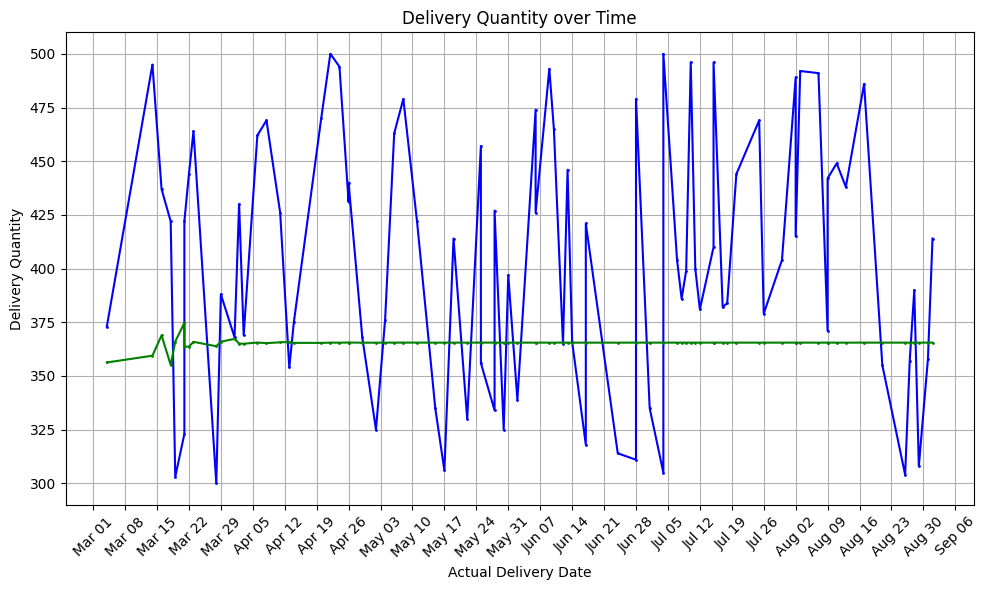

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming selected_rows is your DataFrame


# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['actual_delivery_date_formatted'], df['order_qty'], color='blue', marker='o', linestyle='-', markersize=1)
# plt.plot(df['actual_delivery_date_formatted'], df['delivery_qty'], color='green', marker='o', linestyle='-', markersize=1)
plt.plot(df['actual_delivery_date_formatted'], df['arima_forecast'], color='green', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)

# Set x-axis major ticks to represent weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [14]:
dfx

,Actual,Predict
52426,444,391.542305
52427,469,375.351998
52428,379,371.521629
52429,404,359.161692
52430,489,369.325683
52431,415,434.048122
52432,492,421.867882
52433,491,415.687913
52435,371,405.677576
52434,442,431.852173


In [15]:
dfx = pd.concat([X_testo,dfx], axis=1)
dfx=dfx.reset_index(drop=True)

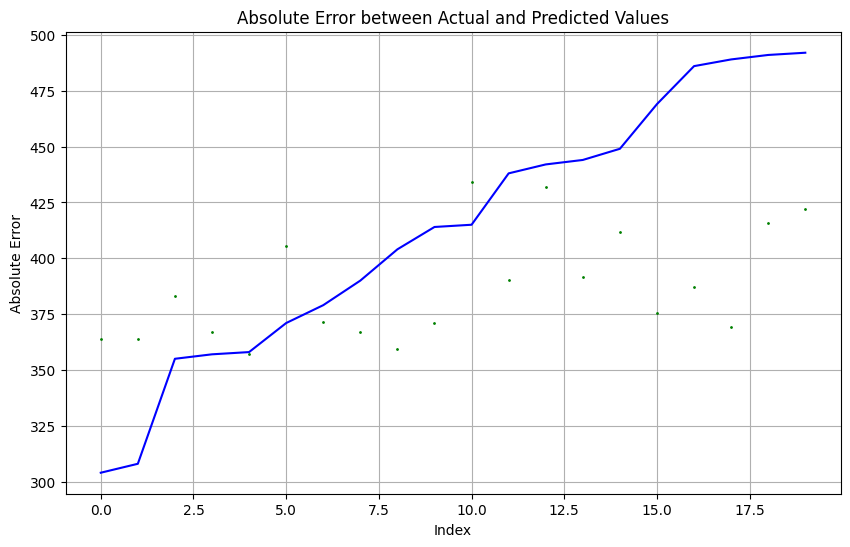

In [16]:
# Sort the DataFrame based on absolute error
df_sorted_Actual = dfx.sort_values(by='Actual')



df_sorted_Actual = df_sorted_Actual.reset_index(drop=True)
plt.figure(figsize=(10, 6))

plt.plot(df_sorted_Actual['Predict'] ,color='green', marker='o', linestyle='', markersize=1)
plt.plot(df_sorted_Actual['Actual'], color='blue', label='Actual')

plt.title('Absolute Error between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

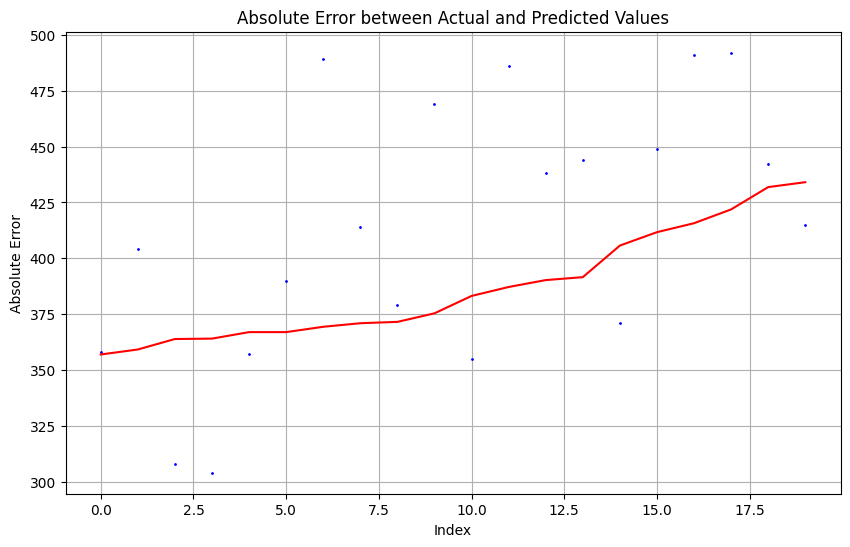

In [17]:
# Sort the DataFrame based on absolute error
df_sorted_Predict = dfx.sort_values(by='Predict')

x1=df_sorted_Predict['Actual'].to_numpy()
x2=df_sorted_Predict['Predict'].to_numpy()


plt.figure(figsize=(10, 6))
plt.plot(x1 ,color='blue', marker='o', linestyle='', markersize=1, label='Actual')
plt.plot(x2, color='red', label='Predict')

plt.title('Absolute Error between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

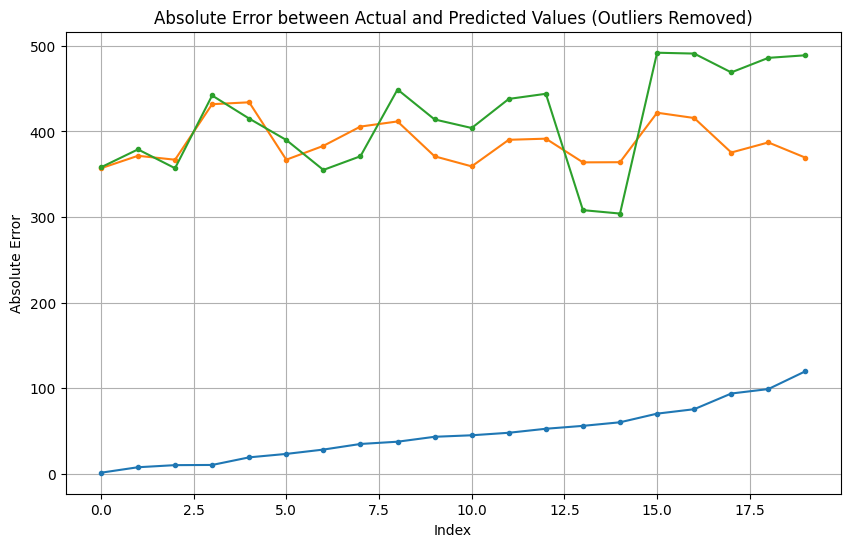

In [18]:
dfx['Abs_Error'] = abs(dfx['Actual'] - dfx['Predict'])

# Sort the DataFrame based on absolute error
df_sorted = dfx.sort_values(by='Abs_Error')

x1=df_sorted['Actual'].to_numpy()
x2=df_sorted['Predict'].to_numpy()
x3=df_sorted['Abs_Error'].to_numpy()
plt.figure(figsize=(10, 6))
plt.plot(x3, marker='.')
plt.plot(x2, marker='.')
plt.plot(x1, marker='.')
plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

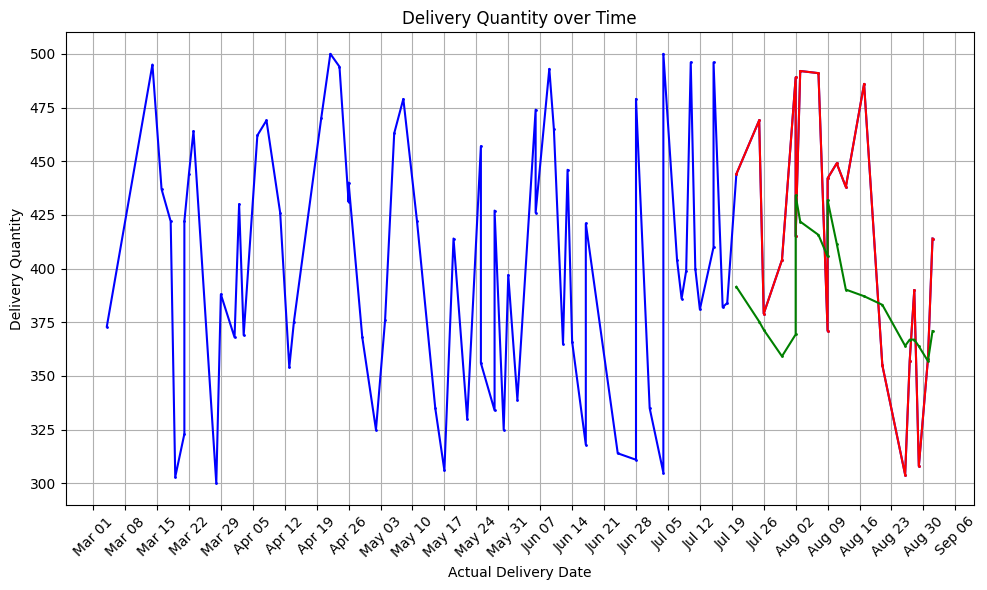

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming selected_rows is your DataFrame

# Convert 'actual_delivery_date' to datetime format
selected_rows['actual_delivery_date_formatted'] = pd.to_datetime(selected_rows['actual_delivery_date'], format='%d-%b-%y')

# Sort DataFrame by 'actual_delivery_date_formatted'
df_sorted_actual_delivery_date = selected_rows.sort_values(by='actual_delivery_date_formatted')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_actual_delivery_date['actual_delivery_date_formatted'], df_sorted_actual_delivery_date['order_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.plot(dfx['actual_delivery_date_formatted'], dfx['Actual'], color='red', marker='o', linestyle='-', markersize=1)
plt.plot(dfx['actual_delivery_date_formatted'], dfx['Predict'], color='green', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)

# Set x-axis major ticks to represent weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()